<a href="https://colab.research.google.com/github/ndtuan10/Selected-Topics-in-Computer-Vision_CS420.M11.KHCL/blob/main/BaiTap/BaiTap1_Th%E1%BB%91ng_k%C3%AA_keyword_c%C3%A1c_b%C3%A0i_b%C3%A1o_trong_1_h%E1%BB%99i_ngh%E1%BB%8B/B%C3%A0i_t%E1%BA%ADp_1_Th%E1%BB%91ng_k%C3%AA_keyword_c%E1%BB%A7a_ti%C3%AAu_%C4%91%E1%BB%81_t%C3%A1c_gi%E1%BA%A3_trong_1_h%E1%BB%99i_ngh%E1%BB%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NGÔ ĐỨC TUẤN**
## **MSSV: 18520186**

# **BÀI TẬP 1**

**Môn : Các vấn đề chọn lọc trong thị giác máy tính - CS420.M11.KHCL**
 
# ***Yêu cầu:*** Thống kê keyword của tiêu đề / tác giả trong 1 hội nghị (NeurIPS 2020)

- Topic hội nghị: MSSV / mod 7 => 1852016 mod 7 = 6 => **NeurIPS 2020**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


# **A. THỐNG KÊ KEYWORD CỦA TÁC GIẢ**

## **1. Đọc file**

In [ ]:
file = open('/content/drive/My Drive/Các vấn đề chọn lọc CV/Data/Authors.csv')
text = file.read()

## **2. Thao tác trên file**
- Đầu tiên ta cần phải download thư viện `nltk`
    - Cú pháp `pip install nltk`
    - Thư viện nlkt (Natural Language ToolKit) là một trong những thư viện dẫn đầu sử dụng trong python làm việc với dữ liệu ngôn ngữ tự nhiên (NLP) . Thư viện cung cấp giao diện với hơn 50 tài nguyên từ vựng và ngữ liệu (corpora), cùng với các thư viện thích hợp để xử lý bài toán phân loại, token hóa (tokenization), stemming,…Để tìm hiểu thư viện nlkt, có thể tham khảo tại đây http://www.nltk.org/.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# viết thường toàn bộ câu (convert text to lower case)
lower_text = text.lower()
print (lower_text)

# tách văn bản thành từng câu
from nltk import sent_tokenize
sents = sent_tokenize(lower_text)
print(sents)

"seongmin ok"
"sangnie bhardwaj, ian fischer, johannes ballé, troy chinen"
"jean-baptiste alayrac, adria recasens, rosalia schneider, relja arandjelović, jason ramapuram, jeffrey de fauw, lucas smaira, sander dieleman, andrew zisserman"
"simiao ren, willie padilla, jordan malof"
"masatoshi uehara, masahiro kato, shota yasui"
"yao-hung hubert tsai, han zhao, makoto yamada, louis-philippe morency, russ r. salakhutdinov"
"oleksandr shchur, nicholas gao, marin biloš, stephan günnemann"
"yiwen guo, qizhang li, hao chen"
"daiyi peng, xuanyi dong, esteban real, mingxing tan, yifeng lu, gabriel bender, hanxiao liu, adam kraft, chen liang, quoc le"
"tamas erdelyi, cameron musco, christopher musco"
"nicholas harvey, christopher liaw, tasuku soma"
"alexandre lacoste, pau rodríguez lópez, frederic branchaud-charron, parmida atighehchian, massimo caccia, issam hadj laradji, alexandre drouin, matthew craddock, laurent charlin, david vázquez"
"avinatan hasidim, haim kaplan, yishay mansour, yossi mati

In [ ]:
# tách từ, dấu câu khỏi văn bản
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
word = tokenizer.tokenize(lower_text)
print(word)

# trong bộ ngữ liệu corpus
# in ra các stopwords phổ biến trong tiếng Anh
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

# loại stopwords khỏi text
removing_stopwords = [word for word in word if word not in stop_words]
print (removing_stopwords)

['seongmin', 'ok', 'sangnie', 'bhardwaj', 'ian', 'fischer', 'johannes', 'ballé', 'troy', 'chinen', 'jean', 'baptiste', 'alayrac', 'adria', 'recasens', 'rosalia', 'schneider', 'relja', 'arandjelović', 'jason', 'ramapuram', 'jeffrey', 'de', 'fauw', 'lucas', 'smaira', 'sander', 'dieleman', 'andrew', 'zisserman', 'simiao', 'ren', 'willie', 'padilla', 'jordan', 'malof', 'masatoshi', 'uehara', 'masahiro', 'kato', 'shota', 'yasui', 'yao', 'hung', 'hubert', 'tsai', 'han', 'zhao', 'makoto', 'yamada', 'louis', 'philippe', 'morency', 'russ', 'r', 'salakhutdinov', 'oleksandr', 'shchur', 'nicholas', 'gao', 'marin', 'biloš', 'stephan', 'günnemann', 'yiwen', 'guo', 'qizhang', 'li', 'hao', 'chen', 'daiyi', 'peng', 'xuanyi', 'dong', 'esteban', 'real', 'mingxing', 'tan', 'yifeng', 'lu', 'gabriel', 'bender', 'hanxiao', 'liu', 'adam', 'kraft', 'chen', 'liang', 'quoc', 'le', 'tamas', 'erdelyi', 'cameron', 'musco', 'christopher', 'musco', 'nicholas', 'harvey', 'christopher', 'liaw', 'tasuku', 'soma', 'alexa

## **3. Thống kê keyword xuất hiện theo thứ tự giảm dần tần suất xuất hiện của từ đó**

In [ ]:
# thống kê token được sử dụng trong văn bản
from nltk.probability import FreqDist
fd = FreqDist(removing_stopwords)
print(fd)

# lấy ra 1000 từ phổ biến nhất ( Most Common Words )
print (fd.most_common(1000))

<FreqDist with 6875 samples and 16298 outcomes>
[('zhang', 218), ('wang', 206), ('li', 181), ('chen', 162), ('liu', 136), ('yang', 117), ('xu', 95), ('yu', 83), ('wu', 72), ('lin', 71), ('wei', 70), ('zhou', 67), ('lee', 64), ('david', 60), ('huang', 60), ('michael', 58), ('daniel', 56), ('zhao', 53), ('kim', 46), ('j', 45), ('alexander', 43), ('sun', 43), ('song', 43), ('zhu', 42), ('andrew', 39), ('lu', 39), ('han', 37), ('thomas', 37), ('van', 34), ('jiang', 34), ('tao', 34), ('cheng', 33), ('john', 33), ('kumar', 33), ('hao', 32), ('yi', 32), ('yuan', 31), ('feng', 31), ('bo', 31), ('yan', 31), ('hu', 30), ('zheng', 30), ('de', 29), ('jonathan', 29), ('peter', 28), ('dong', 27), ('liang', 26), ('qi', 25), ('james', 25), ('jian', 25), ('gupta', 25), ('richard', 25), ('jun', 25), ('yao', 24), ('shi', 24), ('singh', 24), ('andreas', 24), ('martin', 24), ('nguyen', 23), ('tang', 23), ('chang', 23), ('jin', 23), ('andrea', 22), ('tian', 22), ('benjamin', 22), ('r', 21), ('matthew', 21),

## **4. Vẽ biểu đồ các keyword theo thứ tự giảm dần số lần xuất hiện**

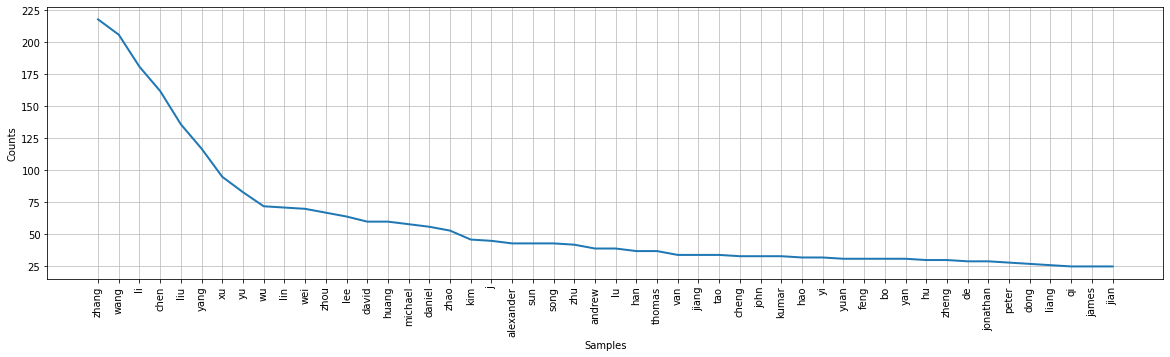

In [ ]:
# Vẽ biểu đồ cho 50 từ phổ biến nhất
fig = plt.figure(figsize = (20,5))
fd.plot(50,cumulative=False)
plt.show()

# save plot
fig.savefig('freqDistofAuthors.png', bbox_inches = "tight")

# **B. THỐNG KÊ KEYWORD CỦA TIÊU ĐỀ**

## **1. Đọc file**

In [ ]:
file1 = open('/content/drive/My Drive/Các vấn đề chọn lọc CV/Data/Papers.csv')
text1 = file1.read()

## **2. Thao tác trên file**
- Đầu tiên ta cần phải download thư viện `nltk`
    - Cú pháp `pip install nltk`
    - Thư viện nlkt (Natural Language ToolKit) là một trong những thư viện dẫn đầu sử dụng trong python làm việc với dữ liệu ngôn ngữ tự nhiên (NLP) . Thư viện cung cấp giao diện với hơn 50 tài nguyên từ vựng và ngữ liệu (corpora), cùng với các thư viện thích hợp để xử lý bài toán phân loại, token hóa (tokenization), stemming,…Để tìm hiểu thư viện nlkt, có thể tham khảo tại đây http://www.nltk.org/.

In [ ]:
# viết thường toàn bộ câu (convert text to lower case)
lower_text1 = text1.lower()
print (lower_text1)

# tách văn bản thành từng câu
from nltk import sent_tokenize
sents1 = sent_tokenize(lower_text1)
print(sents1)

"a graph similarity for deep learning"
"an unsupervised information-theoretic perceptual quality metric"
"self-supervised multimodal versatile networks "
"benchmarking deep inverse models over time, and the neural-adjoint method "
"off-policy evaluation and learning for external validity under a covariate shift "
"neural methods for point-wise dependency estimation "
"fast and flexible temporal point processes with triangular maps "
"backpropagating linearly improves transferability of adversarial examples "
"pyglove: symbolic programming for automated machine learning "
"fourier sparse leverage scores and approximate kernel learning "
"improved algorithms for online submodular maximization via first-order regret bounds "
"synbols: probing learning algorithms with synthetic datasets "
"adversarially robust streaming algorithms via differential privacy "
"trading personalization for accuracy: data debugging in collaborative filtering "
"cascaded text generation with markov transformers 

In [ ]:
# tách từ, dấu câu khỏi văn bản
from nltk.tokenize import RegexpTokenizer

tokenizer1 = RegexpTokenizer(r"\w+")
word1 = tokenizer1.tokenize(lower_text1)
print(word1)

# trong bộ ngữ liệu corpus
# in ra các stopwords phổ biến trong tiếng Anh
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

# loại stopwords khỏi text
removing_stopwords1 = [word for word in word1 if word not in stop_words]
print (removing_stopwords1)

['a', 'graph', 'similarity', 'for', 'deep', 'learning', 'an', 'unsupervised', 'information', 'theoretic', 'perceptual', 'quality', 'metric', 'self', 'supervised', 'multimodal', 'versatile', 'networks', 'benchmarking', 'deep', 'inverse', 'models', 'over', 'time', 'and', 'the', 'neural', 'adjoint', 'method', 'off', 'policy', 'evaluation', 'and', 'learning', 'for', 'external', 'validity', 'under', 'a', 'covariate', 'shift', 'neural', 'methods', 'for', 'point', 'wise', 'dependency', 'estimation', 'fast', 'and', 'flexible', 'temporal', 'point', 'processes', 'with', 'triangular', 'maps', 'backpropagating', 'linearly', 'improves', 'transferability', 'of', 'adversarial', 'examples', 'pyglove', 'symbolic', 'programming', 'for', 'automated', 'machine', 'learning', 'fourier', 'sparse', 'leverage', 'scores', 'and', 'approximate', 'kernel', 'learning', 'improved', 'algorithms', 'for', 'online', 'submodular', 'maximization', 'via', 'first', 'order', 'regret', 'bounds', 'synbols', 'probing', 'learnin

## **3. Thống kê keyword xuất hiện theo thứ tự giảm dần tần suất xuất hiện của từ đó**

In [ ]:
# thống kê token được sử dụng trong văn bản
from nltk.probability import FreqDist
fd1 = FreqDist(removing_stopwords1)
print(fd1)

# lấy ra 1000 từ phổ biến nhất ( Most Common Words )
print (fd1.most_common(1000))

<FreqDist with 3005 samples and 13126 outcomes>
[('learning', 614), ('neural', 233), ('networks', 197), ('deep', 155), ('via', 133), ('optimization', 98), ('reinforcement', 96), ('graph', 89), ('based', 88), ('models', 84), ('efficient', 76), ('robust', 75), ('adversarial', 74), ('data', 74), ('multi', 73), ('training', 72), ('model', 67), ('gradient', 67), ('optimal', 65), ('linear', 60), ('online', 58), ('network', 56), ('supervised', 55), ('analysis', 54), ('using', 54), ('bayesian', 53), ('self', 52), ('policy', 51), ('estimation', 51), ('stochastic', 51), ('inference', 48), ('generative', 45), ('time', 42), ('meta', 42), ('adaptive', 42), ('sparse', 40), ('non', 40), ('descent', 36), ('variational', 36), ('search', 36), ('algorithms', 35), ('object', 35), ('classification', 34), ('causal', 33), ('bandits', 33), ('representations', 33), ('sample', 33), ('methods', 31), ('approach', 31), ('representation', 31), ('fast', 30), ('image', 30), ('prediction', 30), ('generalization', 30),

## **4. Vẽ biểu đồ các keyword theo thứ tự giảm dần số lần xuất hiện**

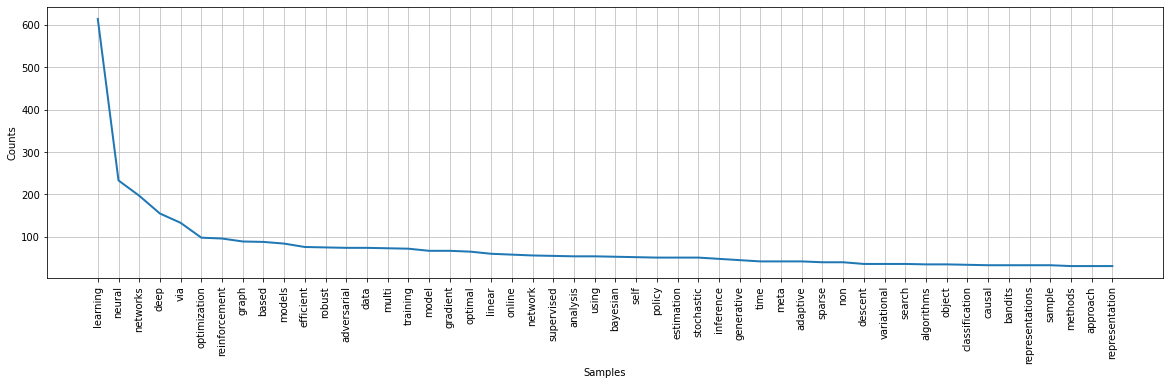

In [ ]:
# Vẽ biểu đồ cho 50 từ phổ biến nhất
fig1 = plt.figure(figsize = (20,5))
fd1.plot(50,cumulative=False)
plt.show()

# save plot
fig1.savefig('freqDistofPapers.png', bbox_inches = "tight")